# Analysis of the chains

here I am mainly concerned with plotting H0 distributions.

### matplotlib settings and test run (suppressed)

In [2]:
colors = [
    "#c51111",  # red
    "#132ed1",  # blue
    "#117f2d",  # green
    "#ed54ba",  # pink
    "#ef7d0d",  # orange
    "#f5f557",  # yellow
    "#3a474e",  # black / dark gray (fixed from 3r474e)
    "#d6e0f0",  # white / light gray
    "#6b2fbb",  # purple
    "#71491e",  # brown
    "#38fedc",  # cyan
    "#50ef39",  # lime
]
from getdist import MCSamples, plots
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os

#plt.style.use("ggplot")        # if you want a more distinct style
plt.style.use("seaborn-v0_8-muted")
colors = mpl.rcParams["axes.prop_cycle"].by_key()["color"]
# Load the damn data
data = np.loadtxt("/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/2025-12-19_1000000__1.txt")

# Get param names  
with open("/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/2025-12-19_1000000_.paramnames") as f:
    paramnames = [line.split()[0] for line in f]

# Skip first 2 columns, take only parameter columns
params = data[:, 2:2+len(paramnames)]

# Replace underscores in labels to avoid LaTeX parsing
clean_labels = [name.replace('_', ' ') for name in paramnames]

# Create samples with clean labels
samples = MCSamples(samples=params, names=paramnames, labels=clean_labels)

# Force no LaTeX
#g = plots.get_subplot_plotter()
#g.triangle_plot([samples], filled=True)

#plt.show()

Removed no burn in


### Functions: load chains and plot H0 posteriors

In [3]:
from pathlib import Path

def load_chains_from_folder(folder_path):
    """Load all valid chains from a folder"""
    all_h0 = []
    

    # patterns_priority = [
    #     "*2000000__*.txt",
    #     "*1010000__*.txt",
    # ]

    # # collect higher-priority files
    # chain_files = []
    # for pattern in patterns_priority:
    #     chain_files.extend(glob.glob(str(folder_path / pattern)))

    # # fallback if none found
    # if not chain_files:
    chain_files = glob.glob(str(folder_path / "*__*.txt"))
    for chain_file in chain_files:
        try:
            data = np.loadtxt(chain_file)
            
            # Skip if file is empddty or too short
            if len(data) < 100:
                continue
                
            # Get H0 values (3rd column, index 2)
            h0_values = data[:, 2]
            
            # Skip if H0 values are nonsense
            if np.any(h0_values < 50) or np.any(h0_values > 100):
                continue
                
            all_h0.append(h0_values)
            
        except Exception as e:
            continue
    
    if all_h0:
        return np.concatenate(all_h0)
    else:
        return None

def plot_axion_group(chain_names, group_name, base_path):
    """Plot H0 distributions for a group of chains"""
    plt.figure(figsize=(12, 8))
    
    # Colors for different lines
    colors = plt.cm.tab10(np.linspace(0, 1, len(chain_names)))
    
    for i, chain_folder in enumerate(chain_names):
        folder_path = base_path / chain_folder
        print(f"Processing {chain_folder}...")
        
        if not folder_path.exists():
            print(f"  Folder does not exist: {folder_path}")
            continue
            
        h0_data = load_chains_from_folder(folder_path)
        
        if h0_data is not None and len(h0_data) > 0:
            # Create KDE
            kde = stats.gaussian_kde(h0_data)
            x_vals = np.linspace(60, 80, 1000)
            y_vals = kde(x_vals)
            
            # Clean up the label
            label = chain_folder.replace(f'{group_name}_', '').replace('planck_TTTEEElensing_', '')
            
            plt.plot(x_vals, y_vals, color=colors[i], linewidth=2, label=label)
            
            # Calculate statistics
            mean = np.mean(h0_data)
            std = np.std(h0_data)
            print(f"  {label}: H0 = {mean:.2f} ± {std:.2f} (n={len(h0_data)})")
    
    plt.xlim(65,75)
    plt.xlabel('H0', fontsize=14)
    plt.ylabel('Probability density', fontsize=14)
    plt.title(f'H0 posterior distributions - {group_name}', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Base path
base = Path("/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp")

# Define your groups
names_1_ax = [
    "1_ax_planck_TTTEEElensing2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_desi2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_sh0es2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_sh0es_desi2025-11-21",
]

names_1_boss_vs_desi = [
    "1_ax_planck_TTTEEElensing_pantheon_plus_boss2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_sh0es_boss2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_desi2025-11-21",
    "1_ax_planck_TTTEEElensing_pantheon_plus_sh0es_desi2025-11-21",
] 

names_4_ax = [
    "4_ax_planck_TTTEEElensing_pantheon_plus2025-11-12",
    "4_ax_planck_TTTEEElensing_pantheon_plus_sh0es2025-11-12",
]

names_9_ax = [
    "planck_TTTEEElensing_mAxi_shooting2025-11-14",
    "9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_desi_2025-12-19",
]

names_9_boss_vs_desi = [
    "9_axions/planck_TTTEEElensing_pantheon_plus_boss_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19",
    "9_axions/planck_TTTEEElensing_pantheon_plus_desi_2025-12-19",
]
# Plot each group
#plot_axion_group(names_1_ax, "1 Axion", base)
#plot_axion_group(names_4_ax, "4 Axions", base)
#plot_axion_group(names_9_ax, "9 Axions", base)
#plot_axion_group(names_0_ax, "0 Axions (Baseline)", base)

In [4]:
def load_samples(chain_glob, param_indices,latex_labels):
    chain_files = glob.glob(chain_glob)

    all_weights = []
    all_samples_selected = []

    for chain_file in chain_files:
        try:
            data = np.loadtxt(chain_file)
            if len(data) < 100:
                continue

            weights = data[:, 0]
            selected_cols = np.column_stack(
                [data[:, idx+2] for idx in param_indices.values()]
            )

            all_weights.append(weights)
            all_samples_selected.append(selected_cols)

        except:
            continue

    weights = np.concatenate(all_weights)
    samples = np.concatenate(all_samples_selected)

    samp =  MCSamples(
        samples=samples,
        weights=weights,
        names=list(param_indices.keys()),
        labels=[latex_labels[name] for name in param_indices.keys()],
        ignore_rows=0.2, #20 percent burnin?
    )

#    samp.setRanges('f')
    return samp


def load_single_samples(chain_glob, param_indices):
    chain_files = glob.glob(chain_glob)

    all_chains_samples = []

    for chain_file in chain_files:
        try:
            data = np.loadtxt(chain_file)
            if len(data) < 100:
                continue

            weights = data[:, 0]
            selected_cols = np.column_stack(
                [data[:, idx+2] for idx in param_indices.values()]
            )

            mc_sample = MCSamples(
                samples=selected_cols,
                weights=weights,
                names=list(param_indices.keys()),
                labels=[latex_labels[name] for name in param_indices.keys()],
                ignore_rows=0.2 #20 percent burnin?
            )
            all_chains_samples.append(mc_sample)
        except:
             continue

    return all_chains_samples




latex_labels = {
    'H0': r'H_0',
    'omega_b': r'10^{-2}\,\omega_b',
    'omega_cdm': r'\omega_{\rm cdm}',
    'ln10^{10}A_s': r'\ln(10^{10} A_s)',
    'n_s': r'n_s',
    'tau_reio': r'\tau_{\rm reio}',

    'fraction_maxion_ac__1': r'f^{(1)}_{\rm ax}',
    'fraction_maxion_ac__2': r'f^{(2)}_{\rm ax}',
    'fraction_maxion_ac__3': r'f^{(3)}_{\rm ax}',
    'fraction_maxion_ac__4': r'f^{(4)}_{\rm ax}',
    'fraction_maxion_ac__5': r'f^{(5)}_{\rm ax}',
    'fraction_maxion_ac__6': r'f^{(6)}_{\rm ax}',
    'fraction_maxion_ac__7': r'f^{(7)}_{\rm ax}',
    'fraction_maxion_ac__8': r'f^{(8)}_{\rm ax}',
    'fraction_maxion_ac__9': r'f^{(9)}_{\rm ax}',

    'A_planck': r'A_{\rm Planck}',
    'M': r'M',
    'z_reio': r'z_{\rm reio}',

    'Omega_Lambda': r'\Omega_\Lambda',
    'Omega_m': r'\Omega_m',

    'YHe': r'Y_{\rm He}',
    '100theta_s': r'100\,\theta_s',

    'A_s': r'A_s',
    'sigma8': r'\sigma_8',

    'rs_d': r'r_s^{\rm drag}',
    'a_eq': r'a_{\rm eq}',
    'k_eq': r'k_{\rm eq}',

    'rd_star': r'r_d^\star',
    'rs_star': r'r_s^\star',
    'da_star': r'D_A^\star',
    'z_star': r'z^\star',

    'rs_rec': r'r_s^{\rm rec}',
    'da_rec': r'D_A^{\rm rec}',
    'z_rec': r'z_{\rm rec}',

    'age': r't_0',
    'theta_star_100': r'100\,\theta_\star',
}

latex_labels_1 = {
    'H0': r'H_0',
    'omega_b': r'10^{-2}\omega_{b}',
    'omega_cdm': r'\omega_{cdm}',
    'ln10^{10}A_s': r'\ln 10^{10}A_{s}',
    'n_s': r'n_{s}',
    'tau_reio': r'\tau_{reio}',
    'fraction_maxion_ac__1': r'fraction_{maxion\ ac\ 1}',
    'log10_maxion_ac__1': r'log10_{maxion\ ac\ 1}',
    'A_planck': r'A_{planck}',
    'M': r'M',
    'z_reio': r'z_{reio}',
    'Omega_Lambda': r'\Omega_{Lambda}',
    'Omega_m': r'\Omega_{m}',
    'YHe': r'YHe',
    '100theta_s': r'100\theta_{s}',
    'A_s': r'A_{s}',
    'sigma8': r'sigma8',
    'rs_d': r'rs_{d}',
    'a_eq': r'a_{eq}',
    'k_eq': r'k_{eq}',
    'rd_star': r'rd_{star}',
    'rs_star': r'rs_{star}',
    'da_star': r'da_{star}',
    'z_star': r'z_{star}',
    'rs_rec': r'rs_{rec}',
    'da_rec': r'da_{rec}',
    'z_rec': r'z_{rec}',
    'age': r'age',
    'theta_star_100': r'\theta_{star\ 100}'
}

latex_labels_4 = {
    'H0': r'H_0',
    'omega_b': r'10^{-2}\omega_{b}',
    'omega_cdm': r'\omega_{cdm}',
    'ln10^{10}A_s': r'\ln 10^{10}A_{s}',
    'n_s': r'n_{s}',
    'tau_reio': r'\tau_{reio}',

    'fraction_maxion_ac__1': r'fraction_{maxion\ ac\ 1}',
    'fraction_maxion_ac__2': r'fraction_{maxion\ ac\ 2}',
    'fraction_maxion_ac__3': r'fraction_{maxion\ ac\ 3}',
    'fraction_maxion_ac__4': r'fraction_{maxion\ ac\ 4}',

    'log10_maxion_ac__1': r'log10_{maxion\ ac\ 1}',
    'log10_maxion_ac__2': r'log10_{maxion\ ac\ 2}',
    'log10_maxion_ac__3': r'log10_{maxion\ ac\ 3}',
    'log10_maxion_ac__4': r'log10_{maxion\ ac\ 4}',

    'A_planck': r'A_{planck}',
    'z_reio': r'z_{reio}',
    'Omega_Lambda': r'\Omega_{Lambda}',
    'Omega_m': r'\Omega_{m}',
    'YHe': r'YHe',
    '100theta_s': r'100\theta_{s}',
    'A_s': r'A_{s}',
    'sigma8': r'sigma8',
    'rs_d': r'rs_{d}',
    'a_eq': r'a_{eq}',
    'k_eq': r'k_{eq}',
    'rd_star': r'rd_{star}',
    'rs_star': r'rs_{star}',
    'da_star': r'da_{star}',
    'z_star': r'z_{star}',
    'rs_rec': r'rs_{rec}',
    'da_rec': r'da_{rec}',
    'z_rec': r'z_{rec}',
    'age': r'age',
    'theta_star_100': r'\theta_{star\ 100}'
}

latex_labels_0 = {
    "H0": r"H_0",
    "omega_b": r"10^{-2}\omega_b",
    "omega_cdm": r"\omega_{\rm cdm}",
    "ln10^{10}A_s": r"\ln 10^{10}A_s",
    "n_s": r"n_s",
    "tau_reio": r"\tau_{\rm reio}",
    "A_planck": r"A_{\rm planck}",
    "M": r"M",
    "z_reio": r"z_{\rm reio}",
    "Omega_Lambda": r"\Omega_\Lambda",
    "Omega_m": r"\Omega_m",
    "YHe": r"Y_{\rm He}",
    "100theta_s": r"100\,\theta_s",
    "A_s": r"A_s",
    "sigma8": r"\sigma_8",
    "rs_d": r"r_{s,d}",
    "a_eq": r"a_{\rm eq}",
    "k_eq": r"k_{\rm eq}",
    "rd_star": r"r_{d,*}",
    "rs_star": r"r_{s,*}",
    "da_star": r"d_{a,*}",
    "z_star": r"z_*",
    "rs_rec": r"r_{s,{\rm rec}}",
    "da_rec": r"d_{a,{\rm rec}}",
    "z_rec": r"z_{\rm rec}",
    "age": r"{\rm age}",
    "theta_star_100": r"\theta_{{\rm star} 100}"
}


latex_labels_3 = {
    "H0": r"H_0",
    "omega_b": r"10^{-2}\omega_b",
    "omega_cdm": r"\omega_{\rm cdm}",
    "ln10^{10}A_s": r"\ln(10^{10}A_s)",
    "n_s": r"n_s",
    "tau_reio": r"\tau_{\rm reio}",
    "fraction_maxion_ac__1": r"f_{{\rm maxion}\,{\rm ac}\,1}",
    "fraction_maxion_ac__2": r"f_{{\rm maxion}\,{\rm ac}\,2}",
    "fraction_maxion_ac__3": r"f_{{\rm maxion}\,{\rm ac}\,3}",
    "A_planck": r"A_{\rm Planck}",
    "M": r"M",
    "z_reio": r"z_{\rm reio}",
    "Omega_Lambda": r"\Omega_\Lambda",
    "Omega_m": r"\Omega_m",
    "YHe": r"Y_{\rm He}",
    "100theta_s": r"100\,\theta_s",
    "A_s": r"A_s",
    "sigma8": r"\sigma_8",
    "rs_d": r"r_{s,d}",
    "a_eq": r"a_{\rm eq}",
    "k_eq": r"k_{\rm eq}",
    "rd_star": r"r_{d,*}",
    "rs_star": r"r_{s,*}",
    "da_star": r"d_{A,*}",
    "z_star": r"z_*",
    "rs_rec": r"r_{s,{\rm rec}}",
    "da_rec": r"d_{A,{\rm rec}}",
    "z_rec": r"z_{\rm rec}",
    "age": r"{\rm age}",
    "theta_star_100": r"\theta_{{\rm star} 100}",
}



latex_labels_5 = {
    "H0": r"H_0",
    "omega_b": r"10^{-2}\omega_b",
    "omega_cdm": r"\omega_{\rm cdm}",
    "ln10^{10}A_s": r"\ln(10^{10}A_s)",
    "n_s": r"n_s",
    "tau_reio": r"\tau_{\rm reio}",
    "fraction_maxion_ac__1": r"f_{{\rm maxion}\,{\rm ac}\,1}",
    "fraction_maxion_ac__2": r"f_{{\rm maxion}\,{\rm ac}\,2}",
    "fraction_maxion_ac__3": r"f_{{\rm maxion}\,{\rm ac}\,3}",
    "fraction_maxion_ac__4": r"f_{{\rm maxion}\,{\rm ac}\,4}",
    "fraction_maxion_ac__5": r"f_{{\rm maxion}\,{\rm ac}\,5}",
    "A_planck": r"A_{\rm Planck}",
    "M": r"M",
    "z_reio": r"z_{\rm reio}",
    "Omega_Lambda": r"\Omega_\Lambda",
    "Omega_m": r"\Omega_m",
    "YHe": r"Y_{\rm He}",
    "100theta_s": r"100\,\theta_s",
    "A_s": r"A_s",
    "sigma8": r"\sigma_8",
    "rs_d": r"r_{s,d}",
    "a_eq": r"a_{\rm eq}",
    "k_eq": r"k_{\rm eq}",
    "rd_star": r"r_{d,*}",
    "rs_star": r"r_{s,*}",
    "da_star": r"d_{A,*}",
    "z_star": r"z_*",
    "rs_rec": r"r_{s,{\rm rec}}",
    "da_rec": r"d_{A,{\rm rec}}",
    "z_rec": r"z_{\rm rec}",
    "age": r"{\rm age}",
    "theta_star_100": r"\theta_{{\rm star} 100}",
}



## Define samples and parameters to plot

In [11]:
#param_names = ['H0','Omega_m','rs_star','sigma8','fraction_maxion_ac__4']
param_names = ['H0','Omega_m', 'rs_star']
#param_names = ['fraction_maxion_ac__1','fraction_maxion_ac__2','fraction_maxion_ac__3','fraction_maxion_ac__4',
 #              'fraction_maxion_ac__5','fraction_maxion_ac__6','fraction_maxion_ac__7','fraction_maxion_ac__8',
  #              'fraction_maxion_ac__9',]
param_indices = {name: i for i, name in enumerate(latex_labels) if name in param_names}
param_indices_0 = {name: i for i, name in enumerate(latex_labels_0) if name in param_names}
param_indices_3 = {name: i for i, name in enumerate(latex_labels_3) if name in param_names}
param_indices_5 = {name: i for i, name in enumerate(latex_labels_5) if name in param_names}



# the first number is the n. of axions
# p = pantheon plus
# d = desi
# b = boss
# s = sh0es
# pd = pantheon plus, desi. etc


##############################################
#############9 axions samples#################
##############################################
samp_9p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/*__*.txt",
    param_indices,
    latex_labels
)

samp_9pb = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_boss_2025-12-27/*__*.txt",
    param_indices,
    latex_labels
)

samp_9pd = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_desi_2025-12-27/*__*.txt",
    param_indices,
    latex_labels
)

samp_9ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-23/*__*.txt",
    param_indices,
    latex_labels
)

samp_9psb = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-27/*__*.txt",
    param_indices,
    latex_labels
)

samp_9psd = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-30/*__*.txt",
    param_indices,
    latex_labels
)

##############################################
#############1 axions samples#################
##############################################


param_names_1_no_p = ['H0','Omega_m','rs_star','sigma8','fraction_maxion_ac__1','log10_maxion_ac__1']
param_indices_1_no_p = {name: i for i, name in enumerate(latex_labels_1) if name in param_names_1_no_p}

# samp_1  = load_samples(
#     "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
#     "chains_mp/1_ax_planck_TTTEEElensing2025-12-23/*__*.txt",
#     param_indices_1_no_p
# )

param_names_1 = ['H0','Omega_m','rs_star','sigma8','M','fraction_maxion_ac__1','log10_maxion_ac__1']
param_indices_1 = {name: i for i, name in enumerate(latex_labels_1) if name in param_names_1}

samp_1p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus2025-12-23/*__*.txt",
    param_indices_1,
    latex_labels_1
)

samp_1pb = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_axion_test/planck_TTTEEElensing_pantheon_plus_boss2025-12-28/*__*.txt",
    param_indices_1,
    latex_labels_1
)

samp_1pd = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus_desi2025-12-27/*__*.txt",
    param_indices_1,
    latex_labels_1)

samp_1ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus_sh0es2025-12-23/*__*.txt",
    param_indices_1,
    latex_labels_1)

samp_1psb = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus_sh0es_boss2025-12-23/*__*.txt",
    param_indices_1,
    latex_labels_1)

samp_1psd = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus_sh0es_desi2025-12-23/*__*.txt",
    param_indices_1,
    latex_labels_1)


##############################################
#############4 axions samples#################
##############################################

param_indices_4_no_p = {name: i for i, name in enumerate(latex_labels_4) if name in param_names_1_no_p}

samp_4  = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/4_axions/planck_TTTEEElensing_2025-12-23/*__*.txt",
    param_indices_4_no_p,
    latex_labels_4)

samp_4p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/4_axions/planck_TTTEEElensing_pantheon_plus_2026-01-03/*__*.txt",
    param_indices_4_no_p,
    latex_labels_4)


samp_4ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/4_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2026-01-05/*__*.txt",
    param_indices_4_no_p,
    latex_labels_4)


##############################################
#############0 axions samples#################
##############################################


#param_names_0 = ['H0','Omega_m','rs_star','sigma8','fraction_maxion_ac__1','M']
#param_indices_0 = {name: i for i, name in enumerate(latex_labels_0) if name in param_names_0}

samp_0p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/0_axions/planck_TTTEEElensing_pantheon_plus_2026-01-08/*__*.txt",
    param_indices_0,
    latex_labels_0)
samp_0ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/0_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2026-01-08/*__*.txt",
    param_indices_0,
    latex_labels_0)


##############################################
#############3 axions samples#################
##############################################

samp_3p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/varying_axions/3_axions/planck_TTTEEElensing_pantheon_plus_2026-01-13/*__*.txt",
    param_indices_3,
    latex_labels_3)
samp_3ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/varying_axions/3_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2026-01-13/*__*.txt",
    param_indices_3,
    latex_labels_3)

##############################################
#############5 axions samples#################
##############################################

samp_5p = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/varying_axions/5_axions/planck_TTTEEElensing_pantheon_plus_2026-01-13/*__*.txt",
    param_indices_5,
    latex_labels_5)
samp_5ps = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/varying_axions/5_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2026-01-13/*__*.txt",
    param_indices_5,
    latex_labels_5)

Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in


Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in


## Here we compare 1 vs 9 axions for each given dataset. 
for the H0 posterior

### 3 axions: p, ps

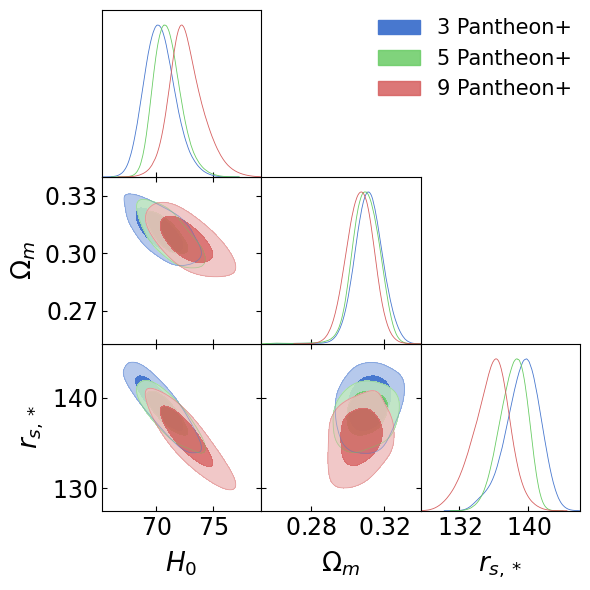

In [17]:
from getdist import plots
import matplotlib.pyplot as plt

g = plots.get_subplot_plotter()

# Make all text bigger
g.settings.axes_fontsize = 20     # tick labels
g.settings.lab_fontsize = 22      # axis labels
g.settings.legend_fontsize = 18   # legend
g.settings.figure_legend_frame = False  # optional, cleaner look

g.triangle_plot(
    [samp_3p, samp_5p, samp_9p],
    params=param_names,
    filled=True,
    contour_colors=colors[:3],
    legend_labels=[
        "3 Pantheon+",
        "5 Pantheon+",
        "9 Pantheon+"
    ]
)

plt.show()


## 5 axions, p, ps

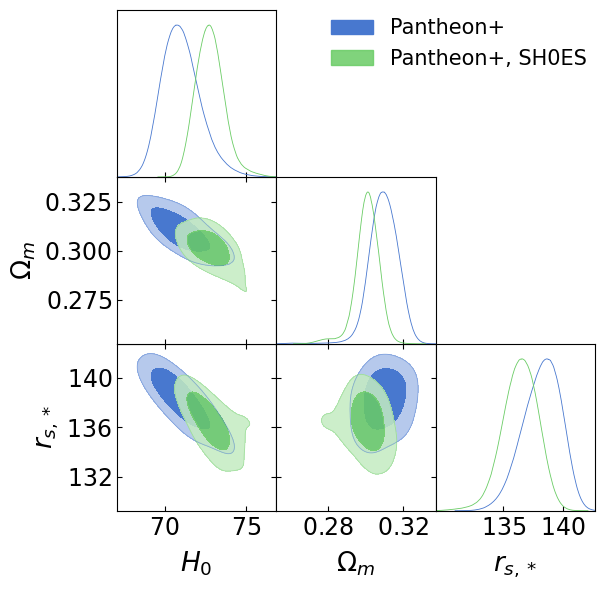

In [15]:

from getdist import plots
import matplotlib.pyplot as plt

g = plots.get_subplot_plotter()

# Make all text bigger
g.settings.axes_fontsize = 20     # tick labels
g.settings.lab_fontsize = 22      # axis labels
g.settings.legend_fontsize = 18   # legend
g.settings.figure_legend_frame = False  # optional, cleaner look

g.triangle_plot(
    [samp_5p, samp_5ps],
    params=param_names,
    filled=True,
    contour_colors=colors[:2],
    legend_labels=[
        "Pantheon+",
        "Pantheon+, SH0ES"
    ]
)

plt.show()


# 9 Axions desi vs boss


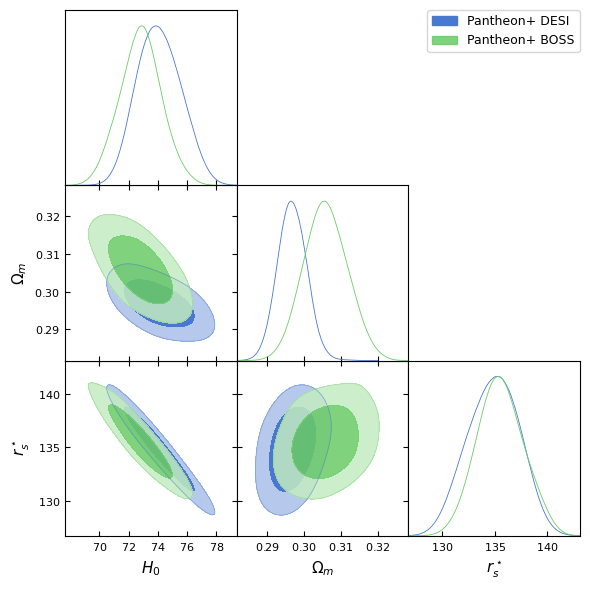

In [7]:
g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_9pd, samp_9pb],
    params=param_names,
    filled=True,
    legend_labels=[
        "Pantheon+ DESI",
        "Pantheon+ BOSS",
    ],
    contour_colors=colors[:2]
)
plt.show()

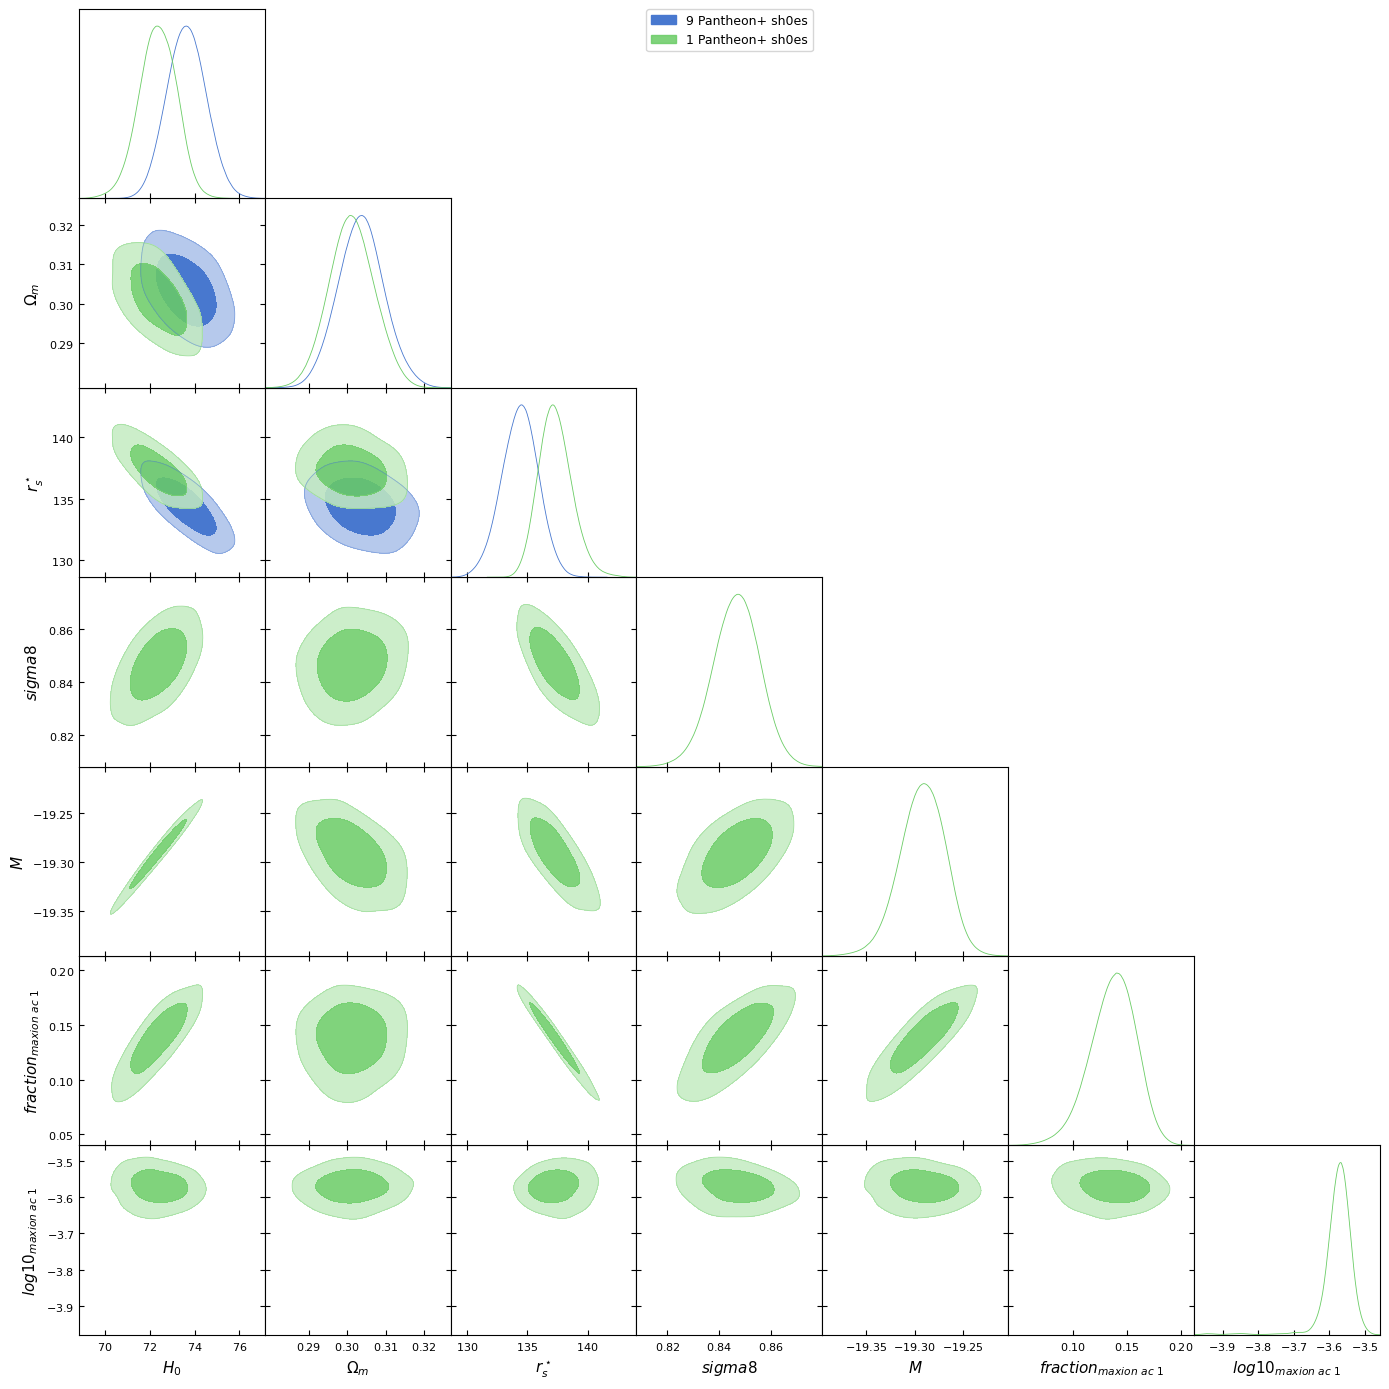

In [8]:
g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_9ps, samp_1ps],
    params=param_names_1,
    filled=True,
    legend_labels=[
        "9 Pantheon+ sh0es",
        "1 Pantheon+ sh0es"
    ],
    contour_colors=colors[:2]
)

plt.show()


## 9 vs 1 axion, Planck

Should I restart the Planck TTTEEE Lensing run to include derived parameters?

In [9]:
param_names = ['H0']
param_indices = {name: i for i, name in enumerate(latex_labels) if name in param_names}

samp_1 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/planck_TTTEEElensing_mAxi_shooting2025-11-14/*__*.txt",
    param_indices
)

samp_2 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing2025-12-23/*__*.txt",
    param_indices
)


g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_1, samp_2],
    params=param_names,
    filled=True,
    legend_labels=[
        "9 axion, TTTEEE,lensing",
        "1 axion, TTTEEE,lensing",
    ],
    contour_colors=colors[:4]
)

plt.show()


TypeError: load_samples() missing 1 required positional argument: 'latex_labels'

## 9 vs 1 axion, Planck lensing + pantheon

In [ ]:
param_names = ['H0','Omega_m','rs_star','sigma8','M']
param_indices = {name: i for i, name in enumerate(latex_labels) if name in param_names}

samp_1 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/*__*.txt",
    param_indices
)

samp_2 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/1_ax_planck_TTTEEElensing_pantheon_plus2025-12-23/*__*.txt",
    param_indices
)


g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_2],
    params=param_names,
    filled=True,
    legend_labels=[
        "1 axion, TTTEEE, lensing, Pantheon+",
    ],
    contour_colors=colors[:1]
)


plt.show()


# Analysis of the chains

here I am mainly concerned with plotting H0 distributions.

# triangle MCMC

# Test pantheon + sh0es vs normal pantheon+ sh0es

In [ ]:
param_names = ['H0','Omega_m','rs_star','sigma8','M','fraction_maxion_ac__4']
param_indices = {name: i for i, name in enumerate(latex_labels) if name in param_names}

samp_1 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19/*__*.txt",
    param_indices
)

samp_2 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-23/*__*.txt",
    param_indices
)
g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_1, samp_2],
    params=param_names,
    filled=True,
    legend_labels=[
        "Pantheon+ SH0ES old",
        "Pantheon+ SH0ES new"
    ],
    contour_colors=colors[:2]
)


g.settings.lab_fontsize = 14       # axis labels
g.settings.axes_fontsize = 12      # tick labels
g.settings.legend_fontsize = 12    # legend
g.settings.legend_loc = (1.05, 1)  # move legend outside
g.settings.alpha_filled_add = 0.7   # filled contours transparency
g.settings.linewidth = 2

plt.show()

In [ ]:
param_names = ['H0','Omega_m','rs_star','sigma8','M','fraction_maxion_ac__4']
param_indices = {name: i for i, name in enumerate(latex_labels) if name in param_names}

samp_1 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/*__*.txt",
    param_indices
)

samp_2 = load_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_2025-12-24/*__*.txt",
    param_indices
)
g = plots.get_subplot_plotter()

g.triangle_plot(
    [samp_1, samp_2],
    params=param_names,
    filled=True,
    legend_labels=[
        "Pantheon+ SH0ES old",
        "Pantheon+ SH0ES new"
    ],
    contour_colors=colors[:2]
)


g.settings.lab_fontsize = 14       # axis labels
g.settings.axes_fontsize = 12      # tick labels
g.settings.legend_fontsize = 12    # legend
g.settings.legend_loc = (1.05, 1)  # move legend outside
g.settings.alpha_filled_add = 0.7   # filled contours transparency
g.settings.linewidth = 2

plt.show()

In [ ]:

g.triangle_plot(
    [samp_1, samp_1p],
    params=param_names_1,
    filled=True,
    legend_labels=[
        "Pantheon+ SH0ES old",
        "Pantheon+ SH0ES new"
    ],
    contour_colors=colors[:2]
)


g.settings.lab_fontsize = 14       # axis labels
g.settings.axes_fontsize = 12      # tick labels
g.settings.legend_fontsize = 12    # legend
g.settings.legend_loc = (1.05, 1)  # move legend outside
g.settings.alpha_filled_add = 0.7   # filled contours transparency
g.settings.linewidth = 2

plt.show()


In [ ]:
def compute_gelman_rubin(samples_list):
    """Compute Gelman-Rubin R-1 for a list of MCSamples"""
    # Get parameter names from the MCSamples object
    param_names = samples_list[0].getParamNames().names
    results = {}
    
    for i, name in enumerate(param_names):
        # Get this parameter from all chains
        chain_data = [chain.samples[:, i] for chain in samples_list]
        
        # Within-chain variance
        W = np.mean([np.var(chain, ddof=1) for chain in chain_data])
        
        # Between-chain variance  
        chain_means = [np.mean(chain) for chain in chain_data]
        n_total = sum(len(c) for c in chain_data)
        B = np.var(chain_means, ddof=1) * n_total / len(chain_data)
        
        # R-1
        var_plus = (n_total - 1) / n_total * W + B / n_total
        results[name] = np.sqrt(var_plus / W)
    
    return results

In [ ]:

samp_1_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19/*__*.txt",
    param_indices
)

samp_2_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-23/*__*.txt",
    param_indices
)

# Compute R-1
r1_1 = compute_gelman_rubin(samp_1_chains)
r1_2 = compute_gelman_rubin(samp_2_chains)

# Print results
print("Run 1 R-1:")
for param, value in r1_1.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")

print("\nRun 2 R-1:")  
for param, value in r1_2.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")

In [ ]:

samp_1_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/*__*.txt",
    param_indices
)

samp_2_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/9_axions_test/planck_TTTEEElensing_pantheon_plus_2025-12-24/*__*.txt",
    param_indices
)

# Compute R-1
r1_1 = compute_gelman_rubin(samp_1_chains)
r1_2 = compute_gelman_rubin(samp_2_chains)

# Print results
print("Run 1 R-1:")
for param, value in r1_1.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")

print("\nRun 2 R-1:")  
for param, value in r1_2.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")

In [ ]:

samp_1_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/4_axions/planck_TTTEEElensing_pantheon_plus_2025-12-23/*__*.txt",
    param_indices
)

samp_2_chains = load_single_samples(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/"
    "chains_mp/4_axions/planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-23/*__*.txt",
    param_indices
)

# Compute R-1
r1_1 = compute_gelman_rubin(samp_1_chains)
r1_2 = compute_gelman_rubin(samp_2_chains)

# Print results
print("Run 1 R-1:")
for param, value in r1_1.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")

print("\nRun 2 R-1:")  
for param, value in r1_2.items():
    print(f"  {param}: {value:.4f} {'✓' if value < 1.1 else '✗'}")